LOAD LIBRARY

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

LOAD DRIVE

In [2]:
drive.mount('/content/drive/')
path = '/content/drive/My Drive/Colab Notebooks/ESC597/Tree-based methods/'

Mounted at /content/drive/


LOAD DATA


Total time taken loading data (in seconds): 3.99


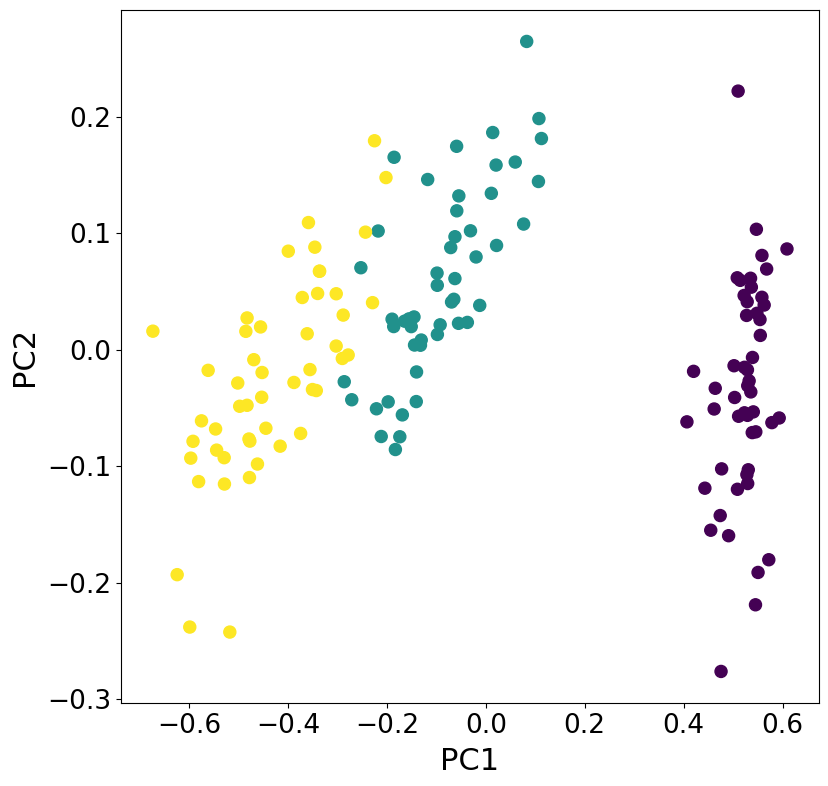

In [3]:
time_start = time.time()

data = np.loadtxt('{}data_iris2.txt'.format(path))
X = data
info = np.loadtxt('{}info_iris2.txt'.format(path))
y = info
plt.figure(figsize = (9, 9))
plt.scatter(X[:,0], X[:,1], c = y, s = 75)
plt.tick_params(axis='x', which='major', labelsize=19)
plt.tick_params(axis='y', which='major', labelsize=19)
plt.xlabel('PC1', labelpad = 6, fontsize = 22)
plt.ylabel('PC2', labelpad = 6, fontsize = 22)
plt.savefig('data.jpg', bbox_inches = 'tight', dpi = 400)

time_taken = time.time() - time_start
print('\nTotal time taken loading data (in seconds): {:.2f}'.format(time_taken))

CREATE TRAIN,VALIDATION AND TEST DATASETS

In [4]:
seed = 1234 #Define random seed for the shuffling of data
test_size = 0.2 #Define the percentage of testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed, shuffle=True)

print("X_train Size:" + str(X_train.shape))
print("X_test Size:" + str(X_test.shape))

print("y_train Size:" + str(y_train.shape))
print("y_test Size:" + str(y_test.shape))

X_train Size:(120, 2)
X_test Size:(30, 2)
y_train Size:(120,)
y_test Size:(30,)


SCALE THE DATA

In [5]:
# Normalize Input Data
scaler = MinMaxScaler((-1, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

DEFINE RANGES OF THE PARAMETERS TO PERFORM GRIDSEARCH FOR

In [6]:
# n_estimators: The number of trees/estimators to use.
# max_depth: The maximum depth of each tree / How much can the tree expand.
# min_samples_split: The minium number of samples required at node to be split.
# max_features: The number of features to consider when looking for the best split.
# max_samples: The number of samples to draw from X_train to train each base estimator.
# criterion: The function to measure the quality of a split.

model_params = {
     'n_estimators': [3, 9, 13, 23, 43,],
     'max_depth': [5, 10, 50],
     'min_samples_split': [2,],
     'max_features': [1.0],
     'max_samples': [1.0],
     'criterion': ["gini"]
 }

INITIALIZE THE MODEL ΤΟ PERFORM THE GRID SEARCH OVER THE DEFINED RANGES OF THE DESIRED PARAMETERS

In [7]:
n_Kfolds = 5 # number of K-folds to consider fro cross-validation
model_GridSearch = RandomForestClassifier(random_state = seed,verbose=1)
model_GridSearch = GridSearchCV(model_GridSearch, model_params, cv = n_Kfolds,verbose=1, scoring = "accuracy")
print(model_GridSearch)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(random_state=1234, verbose=1),
             param_grid={'criterion': ['gini'], 'max_depth': [5, 10, 50],
                         'max_features': [1.0], 'max_samples': [1.0],
                         'min_samples_split': [2],
                         'n_estimators': [3, 9, 13, 23, 43]},
             scoring='accuracy', verbose=1)


FIT THE MODEL

In [8]:
time_start = time.time()

model_GridSearch.fit(X_train, y_train) 

time_taken = time.time() - time_start
print('\nTotal time taken performing Grid Search (in seconds): {:.2f}'.format(time_taken))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j


Total time taken performing Grid Search (in seconds): 9.48


[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished


PRINT THE PARAMETERS OF THE BEST MODEL THAT WAS GIVEN FROM GRIDSEARCH

In [9]:
best_estimator = model_GridSearch.best_estimator_ # get the best model
best_score = model_GridSearch.best_score_ # get the score for the best estimator
best_parameters = model_GridSearch.best_params_ # get the parameters for the best estimator

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", best_estimator)
print("\n The best score across ALL searched params:\n", best_score)
print("\n The best parameters across ALL searched params:\n", best_parameters)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=5, max_features=1.0, max_samples=1.0,
                       n_estimators=9, random_state=1234, verbose=1)

 The best score across ALL searched params:
 0.9333333333333332

 The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': 5, 'max_features': 1.0, 'max_samples': 1.0, 'min_samples_split': 2, 'n_estimators': 9}


PLOT THE GRIDSEARCH RESULTS

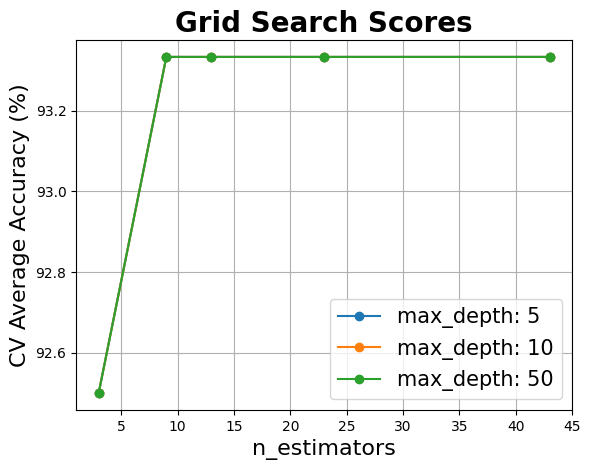

In [15]:
name_param_1 = "n_estimators"
name_param_2 = "max_depth"

grid_param_1 = model_params["n_estimators"]
grid_param_2 = model_params["max_depth"]

scores_mean = model_GridSearch.cv_results_['mean_test_score'] * 100
scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

# Plot Grid search scores
_, ax = plt.subplots(1,1)

# Param1 is the X-axis, Param 2 is represented as a different curve (color line)
for idx, val in enumerate(grid_param_2):
    ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
ax.set_xlabel(name_param_1, fontsize=16)
ax.set_ylabel('CV Average Accuracy (%)', fontsize=16)
ax.legend(loc="best", fontsize=15)
ax.grid('on')

plt.savefig("convergence")

INITIALIZE AND FIT THE MODEL WITH THE BEST PARAMETERS

In [11]:
time_start = time.time()

#Initialize a new model directly using the best parameters obtained from Grid Search.
model = RandomForestClassifier(**best_parameters) # ** is used before the variable best_parameters to unpack it into a variable type that can be inserted to the model function.

#Initialize a new model setting the parameters manually.
model = RandomForestClassifier(criterion = "gini", max_depth= 5, max_features = 1.0, max_samples = 0.3, min_samples_split = 2, n_estimators = 9, random_state = seed, verbose = 1)

model.fit(X_train, y_train)

time_taken = time.time() - time_start
print('\nTotal time taken fitting the model (in seconds): {:.2f}'.format(time_taken))


Total time taken fitting the model (in seconds): 0.02


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished


DEFINE FUNCTION TO PLOT THE CONFUSION MATRIX

In [12]:
def plot_confusion_matrix(dataset_type, predicted_labels, true_labels, model):
    cm = confusion_matrix(true_labels, predicted_labels, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels = model.classes_)
    disp.plot()
    disp.ax_.set_title(dataset_type)

    fig=disp.figure_
    fig.set_size_inches(6, 6)
    fig.savefig('Confusion Matrix'+dataset_type+'.jpg', dpi=400)

CREATE CONFUSION MATRIX FOR TRAINING, VALIDATION AND TESTING DATASETS

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished


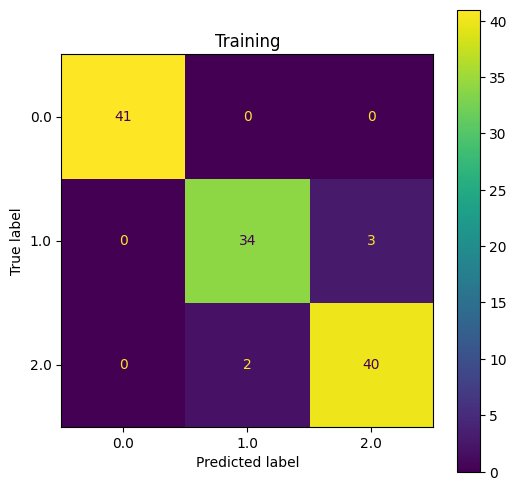

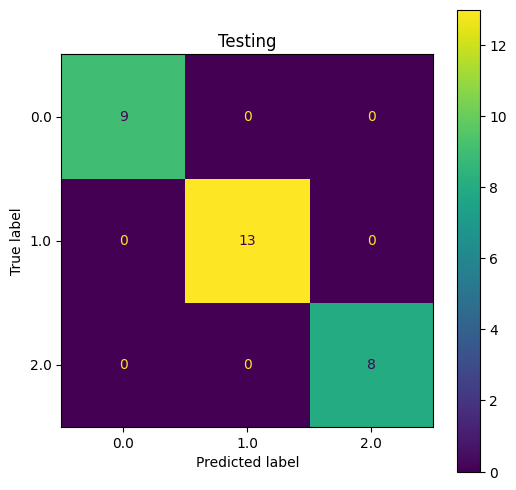

In [13]:
# Training
dataset_type = "Training"
predictions_train = model.predict(X_train)
plot_confusion_matrix(dataset_type, predictions_train, y_train, model)

# Testing
dataset_type = "Testing"
predictions_test = model.predict(X_test)
plot_confusion_matrix(dataset_type, predictions_test, y_test, model)

CALCULATE THE TRAINING, VALIDATION AND TESTING ACCURACIES

In [14]:
# Training 
accuracy_train = accuracy_score(y_train, predictions_train)

# Testing
accuracy_test = accuracy_score(y_test, predictions_test)

print("Training Accuracy: %.2f%%" % (accuracy_train * 100.0))
print("Testing Accuracy: %.2f%%" % (accuracy_test * 100.0))

Training Accuracy: 95.83%
Testing Accuracy: 100.00%
